# Project 2 - Investigate a Dataset
# Conflicts. No schooling and its relationship with deadly diseases in childhood.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> The purpose of this project is to try to discover childhood diseases that cause deaths in places where there is a lack of schooling due to military conflicts. In other words; how armed conflicts affect non-schooling and if there is a pattern in the diseases that derive from them.

> I have divided this analysis into four main blocks or data set:
> * Deaths due to conflicts.
> * Lack of children's schooling.
> * Main childhood diseases.
> * Deaths from these diseases.

> Later I will try to answer the following questions.
> ### Questions:
> <ul>
> <li><a href="#1">1. The 10 countries with the highest average of conflicts?</a></li>
> <li><a href="#2">2. How many children are not schooled because of conflicts?</a></li>
> <li><a href="#3">3. What diseases are due to the lack of schooling?</a></li>
> </ul>

In [1]:
# Import necesary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties
#### Loading and cleaning data.

In [2]:
# Cargue sus datos e imprima unas pocas líneas. Realizar operaciones de inspección de datos.
# tipos y busque instancias de datos faltantes o posiblemente errantes.

# load and clean num dead in conflicts. Global.
df_cfl = pd.read_csv('CONFLICTOS_num_de_muertes.csv')
df_cfl = df_cfl.drop('Country Code', 1)
df_cfl = df_cfl.drop_duplicates()
# df_cfl.fillna(value=0, inplace=True)

# niños sin escolarizar primaria
df_esc = pd.read_csv('ESCOLARIZACION_tasa_alfabetizacion_jovenes.csv')
df_esc.drop_duplicates()
# df_esc.fillna(value=0, inplace=True)

# Muertes por enfermedad
df_M_dia = pd.read_csv('M_diarrhoeal_deaths_in_children_1_59_months_total_deaths.csv') 
df_M_dia.dropna()
df_M_dia.drop_duplicates()
df_M_dia.fillna(value=0, inplace=True)
# hiv
df_M_hiv = pd.read_csv('M_hiv_deaths_in_children_1_59_months_total_deaths.csv') 
df_M_hiv.dropna()
df_M_hiv.drop_duplicates()
df_M_hiv.fillna(value=0, inplace=True)
# malaria
df_M_mal = pd.read_csv('M_malaria_deaths_in_children_1_59_months_total_deaths.csv') 
df_M_mal.dropna()
df_M_mal.drop_duplicates()
df_M_mal.fillna(value=0, inplace=True)
# measles
df_M_mea = pd.read_csv('M_measles_deaths_in_children_1_59_months_total_deaths.csv')
df_M_mea.dropna()
df_M_mea.drop_duplicates()
df_M_mea.fillna(value=0, inplace=True)
# meningitis
df_M_men = pd.read_csv('M_meningitis_deaths_in_children_1_59_months_total_deaths.csv')
df_M_men.dropna()
df_M_men.drop_duplicates()
df_M_men.fillna(value=0, inplace=True)
# ncd
df_M_ncd = pd.read_csv('M_ncd_deaths_in_children_1_59_months_total_deaths.csv')
df_M_ncd.dropna()
df_M_ncd.drop_duplicates()
df_M_ncd.fillna(value=0, inplace=True)
# other_infections
df_M_oth = pd.read_csv('M_other_infections_deaths_in_children_1_59_months_total_deaths.csv')
df_M_oth.dropna()
df_M_oth.drop_duplicates()
df_M_oth.fillna(value=0, inplace=True)
# pertussis
df_M_per = pd.read_csv('M_pertussis_deaths_in_children_1_59_months_total_deaths.csv')
df_M_per.dropna()
df_M_per.drop_duplicates()
df_M_per.fillna(value=0, inplace=True)
# pneumonia
df_M_neu = pd.read_csv('M_pneumonia_deaths_in_children_1_59_months_total_deaths.csv')
df_M_neu.dropna()
df_M_neu.drop_duplicates()
df_M_neu.fillna(value=0, inplace=True)

# Muertes por enfermedades en niños
df_M_rate = pd.read_csv('M_provabilidad_de_muerte_ninos_5_14_x_1000.csv')
df_M_rate.dropna()
df_M_rate.drop_duplicates()
df_M_rate.fillna(value=0, inplace=True)

df_M_boy = pd.read_csv('M_ninos_0_5_por_1000_nacimientos.csv')
df_M_boy.dropna()
df_M_boy.drop_duplicates()
df_M_boy.fillna(value=0, inplace=True)

df_M_child = pd.read_csv('M_child_mortality_0_5_x_1000_born.csv')
df_M_child.dropna()
df_M_child.drop_duplicates()
df_M_child.fillna(value=0, inplace=True)

#### Refinement
We just want to stay with 3 columns: country, year and value.

### CONFLICTS.

In [3]:
# The 'Country Name' column we rename
df_cfl=df_cfl.rename(columns={'Country Name':'country'})
df_cfl.head(2)

,country,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,5174.0,1478.0,3302.0,4276.0,4071.0,8937.0,5499.0,3177.0,6396.0,...,5552.0,6341.0,6864.0,7405.0,7719.0,8056.0,12285.0,17273.0,17981.0,18950.0


#### UNPIVOT.

In [4]:
# Unpivot the dS, rename columns, change the data type and clear more deads in conflicts
df_cfl=df_cfl.set_index('country').stack().reset_index()
df_cfl=df_cfl.rename(columns={'level_1':'year', 0:'dead'})
df_cfl[['dead']]=df_cfl[['dead']].astype(int)
df_cfl.dropna(inplace = True)

In [5]:
df_cfl.head(2)

,country,year,dead
0,Afghanistan,1989,5174
1,Afghanistan,1990,1478


CHILDREN WITHOUT SCHOOLING.

In [6]:
df_esc.head(2)

,country,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,"30,1",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"98,8",NaN,NaN,"98,8"


In [7]:
# Unpivot the dS, rename columns, change the data type and clear more deads in conflicts
df_esc=df_esc.set_index('country').stack().reset_index()
df_esc=df_esc.rename(columns={'level_1':'year', 0:'dead'})
# df_esc[['dead']]=df_esc[['dead']].astype(int)
df_esc.dropna(inplace = True)

In [8]:
# This df_esc now is OK. CHILDREN WITHOUT SCHOOL
df_esc.head(2)

,country,year,dead
0,Afghanistan,1979,"30,1"
1,Albania,2001,"99,4"


## merge join conflicts with eschooling

In [9]:
df_combined = df_cfl.merge(df_esc, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')

In [10]:
df_combined = df_combined.rename(columns={'dead_x':'dead_cfl','dead_y':'no_school'})
df_combined.head(2)

,country,year,dead_cfl,no_school
0,Angola,2001,1123,"72,2"
1,Burundi,2000,1348,"73,3"


#### CHILDHOOD ILLNESSES
DEATHS FOR DIARRHEA

In [11]:
df_M_dia.head(2)

,country,2008
0,Afghanistan,88200
1,Albania,12


Exclude deaths due to diarrhea due to lack of data. Only to seem in the 2008 source

DEATHS FOR HIV

In [12]:
df_M_hiv.head(2)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,1.2400,1.3800,1.5300,1.690,1.8700,2.0600,2.260,2.4600,2.6500,...,5.1200,5.5600,5.9100,6.2600,6.69000,7.410,8.22000,9.21000,10.60000,10.80000
1,Albania,0.0691,0.0749,0.0802,0.065,0.0518,0.0477,0.042,0.0356,0.0334,...,0.0244,0.0197,0.0157,0.0112,0.00873,0.008,0.00784,0.00793,0.00807,0.00822


In [13]:
# Unpivot the df, rename columns, change the data type and clear more 
df_M_hiv=df_M_hiv.set_index('country').stack().reset_index()
df_M_hiv=df_M_hiv.rename(columns={'level_1':'year', 0:'dead'})
# df_M_hiv[['dead']]=df_M_hiv[['dead']].astype(int)
df_M_hiv.dropna(inplace = True)

In [14]:
df_combined = df_combined.merge(df_M_hiv, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')
df_combined = df_combined.rename(columns={'dead':'hiv'})
df_combined.head(2)

,country,year,dead_cfl,no_school,hiv
0,Angola,2001,1123,"72,2",887.0
1,Burundi,2000,1348,"73,3",998.0


DEATHS FOR MALARIA

In [15]:
df_M_mal.head(2)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,185.0,192.0,197.0,207.0,226.0,236.0,251.0,258.0,273.0,...,441.0,414.0,384.0,272.0,218.0,209.0,337.0,372.0,394.0,410.0
1,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Unpivot the df, rename columns, change the data type and clear more 
df_M_mal=df_M_mal.set_index('country').stack().reset_index()
df_M_mal=df_M_mal.rename(columns={'level_1':'year', 0:'dead'})
df_M_mal[['dead']]=df_M_mal[['dead']].astype(int)
df_M_mal.dropna(inplace = True)
df_M_mal.head(2)

,country,year,dead
0,Afghanistan,1990,185
1,Afghanistan,1991,192


In [17]:
df_combined = df_combined.merge(df_M_mal, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')
df_combined = df_combined.rename(columns={'dead':'malaria'})
df_combined.head(2)

,country,year,dead_cfl,no_school,hiv,malaria
0,Angola,2001,1123,"72,2",887.0,5650
1,Burundi,2000,1348,"73,3",998.0,11900


DEATHS FOR MEASLES

In [18]:
df_M_mea.head(2)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,18900.0,18500.0000,18500.0000,18700.0000,19200.0000,18800.0000,19600.00,19700.00,20300.00,...,3840.0000,5770.0000,7510.00000,18600.0000,22500.0000,21500.00000,6980.0000,3080.00000,1730.000,556.000
1,Albania,333.0,0.0239,0.0378,0.0192,0.0757,0.0347,2.68,5.03,3.77,...,0.0268,0.0248,0.00117,0.0104,0.0266,0.00831,0.0006,0.00233,0.167,0.166


In [19]:
# Unpivot the df, rename columns, change the data type and clear more 
df_M_mea=df_M_mea.set_index('country').stack().reset_index()
df_M_mea=df_M_mea.rename(columns={'level_1':'year', 0:'dead'})
# df_M_mea[['dead']]=df_esc[['dead']].astype(int)
df_M_mea.dropna(inplace = True)

In [20]:
df_combined = df_combined.merge(df_M_mea, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')
df_combined = df_combined.rename(columns={'dead':'measles'})
df_combined.head(2)

,country,year,dead_cfl,no_school,hiv,malaria,measles
0,Angola,2001,1123,"72,2",887.0,5650,7930.0
1,Burundi,2000,1348,"73,3",998.0,11900,2440.0


MUERTES POR MENINGITIS

In [21]:
df_M_mea.head(2)

,country,year,dead
0,Afghanistan,1990,18900.0
1,Afghanistan,1991,18500.0


In [22]:
# Unpivot the df, rename columns, change the data type and clear more 
df_M_men=df_M_mea.set_index('country').stack().reset_index()
df_M_men=df_M_mea.rename(columns={'level_1':'year', 0:'dead'})
df_M_men[['dead']]=df_M_men[['dead']].astype(int)
df_M_men.dropna(inplace = True)

In [23]:
df_combined = df_combined.merge(df_M_mea, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')
df_combined = df_combined.rename(columns={'dead':'meningitis'})
df_combined.head(2)

,country,year,dead_cfl,no_school,hiv,malaria,measles,meningitis
0,Angola,2001,1123,"72,2",887.0,5650,7930.0,7930.0
1,Burundi,2000,1348,"73,3",998.0,11900,2440.0,2440.0


MUERTES POR OTHERS INFECTIONS

In [24]:
df_M_oth.head(2)

,country,2008
0,Afghanistan,48800
1,Albania,99


Exclude deaths due to others infections due to lack of data. Only to seem in the 2008 source

MUERTES POR PERTUSSIS

In [25]:
df_M_per.head(2)

,country,2008
0,Afghanistan,1090
1,Albania,0


Exclude deaths due to others infections due to lack of data. Only to seem in the 2008 source

MUERTES POR NEUMONÍA

In [26]:
df_M_neu.head(2)

,country,2008
0,Afghanistan,72700
1,Albania,106


Exclude deaths due to others infections due to lack of data. Only to seem in the 2008 source

#### Data types are changed to numeric

In [27]:
df_combined = df_combined.astype({'year':'int'})
df_combined.no_school = pd.to_numeric(df_combined.no_school, errors='coerce')
df_combined.dtypes

country        object
year            int32
dead_cfl        int32
no_school     float64
hiv           float64
malaria         int32
measles       float64
meningitis    float64
dtype: object

## ANSWERING QUESTIONS

<a id='1'></a>
### 1. The 10 countries with the highest average of conflicts?

In [28]:
df_dead_cfl = df_combined.groupby('country').dead_cfl.mean()
df_dead_cfl = df_dead_cfl.sort_values(ascending=[False]).head(10)
df_dead_cfl

country
Sri Lanka      3792.000000
Pakistan       2732.500000
Sudan          2122.500000
Libya          1930.000000
India          1891.666667
Angola         1123.000000
Philippines    1102.500000
Burundi         774.500000
Colombia        603.000000
Uganda          592.333333
Name: dead_cfl, dtype: float64

<BarContainer object of 10 artists>

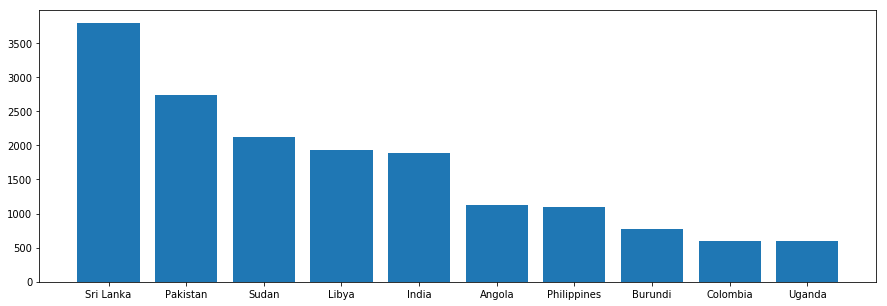

In [32]:
fig, axs = plt.subplots(1, figsize=(15, 5), sharey=True)
axs.bar(df_dead_cfl.keys(),df_dead_cfl.values)

<a id='2'></a>
###  2. How many children are not schooled because of conflicts?

In [45]:
df_no_school = df_combined.groupby('country').no_school.mean()
df_no_school = df_no_school.sort_values(ascending=[True]).head(10)
df_no_school

country
Ethiopia      55.0
Mauritania    69.0
Nepal         70.0
Guatemala     76.0
Malta         96.0
Colombia      97.8
Sri Lanka     98.0
Thailand      98.0
Algeria        NaN
Angola         NaN
Name: no_school, dtype: float64

<BarContainer object of 10 artists>

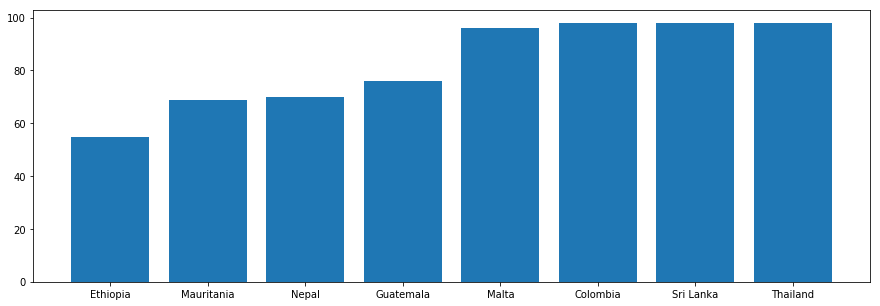

In [46]:
fig, axs = plt.subplots(1, figsize=(15, 5), sharey=True)
axs.bar(df_no_school.keys(),df_no_school.values)

We see how Ethiopia has the lowest enrollment rate and Guatemala in America.

<a id='3'></a>
### 3. What diseases are due to the lack of schooling?

### HIV

In [48]:
df_hiv = df_combined.groupby('country').hiv.mean()
df_hiv = df_hiv.sort_values(ascending=[False]).head(10)
df_hiv

country
Uganda              8536.666667
Kenya               7330.000000
Ethiopia            5747.500000
India               4875.666667
Congo, Dem. Rep.    4210.000000
Cote d'Ivoire       1500.000000
Rwanda               952.000000
Chad                 928.333333
Angola               887.000000
Burundi              860.000000
Name: hiv, dtype: float64

<BarContainer object of 10 artists>

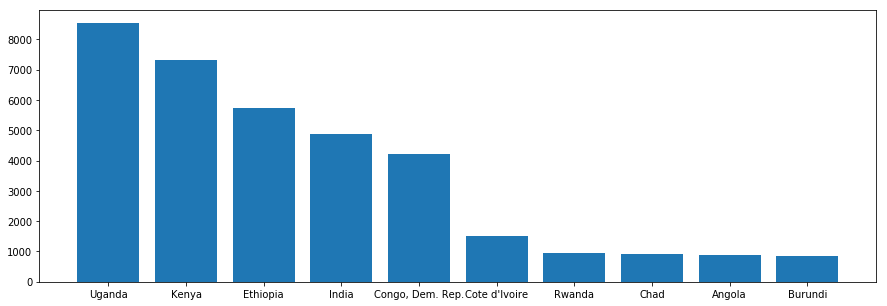

In [50]:
fig, axs = plt.subplots(1, figsize=(15, 5), sharey=True)
axs.bar(df_hiv.keys(),df_hiv.values)

### MALARIA

In [51]:
df_malaria = df_combined.groupby('country').malaria.mean()
df_malaria = df_malaria.sort_values(ascending=[False]).head(10)
df_malaria

country
Congo, Dem. Rep.    89200.000000
Uganda              47266.666667
India               37633.333333
Cote d'Ivoire       22000.000000
Mali                20000.000000
Ethiopia             9350.000000
Burundi              9040.000000
Rwanda               6590.000000
Angola               5650.000000
Kenya                5460.000000
Name: malaria, dtype: float64

<BarContainer object of 10 artists>

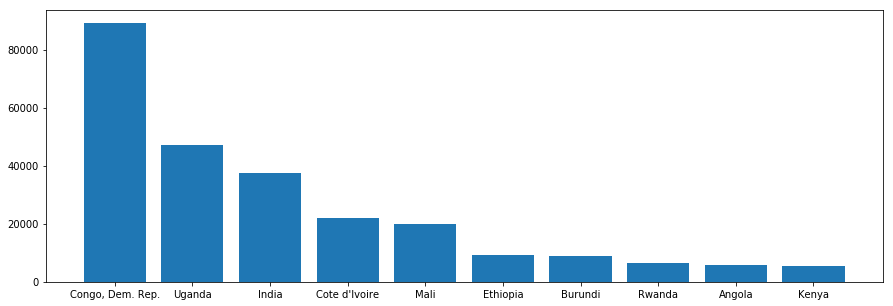

In [52]:
fig, axs = plt.subplots(1, figsize=(15, 5), sharey=True)
axs.bar(df_malaria.keys(),df_malaria.values)

### MEASLES

In [53]:
df_measles = df_combined.groupby('country').measles.mean()
df_measles = df_measles.sort_values(ascending=[False]).head(10)
df_measles

country
India               148566.666667
Ethiopia             31550.000000
Indonesia            20350.000000
Bangladesh           15200.000000
Pakistan             14547.500000
Angola                7930.000000
Chad                  6410.000000
Congo, Dem. Rep.      5300.000000
Rwanda                4760.000000
Sudan                 3785.000000
Name: measles, dtype: float64

<BarContainer object of 10 artists>

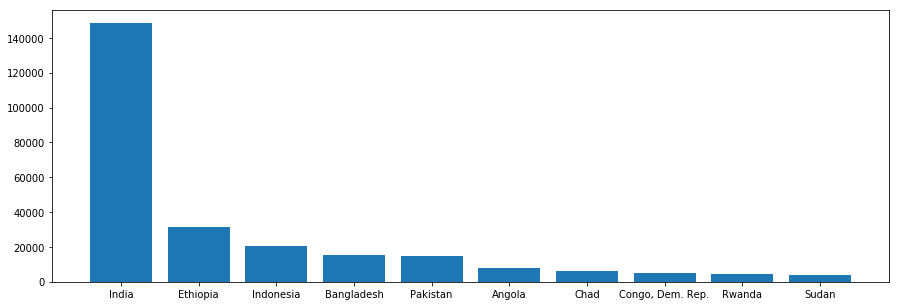

In [54]:
fig, axs = plt.subplots(1, figsize=(15, 5), sharey=True)
axs.bar(df_measles.keys(),df_measles.values)

### MENINGITIS

In [55]:
df_meningitis = df_combined.groupby('country').meningitis.mean()
df_meningitis = df_meningitis.sort_values(ascending=[False]).head(10)
df_meningitis

country
India               148566.666667
Ethiopia             31550.000000
Indonesia            20350.000000
Bangladesh           15200.000000
Pakistan             14547.500000
Angola                7930.000000
Chad                  6410.000000
Congo, Dem. Rep.      5300.000000
Rwanda                4760.000000
Sudan                 3785.000000
Name: meningitis, dtype: float64

<BarContainer object of 10 artists>

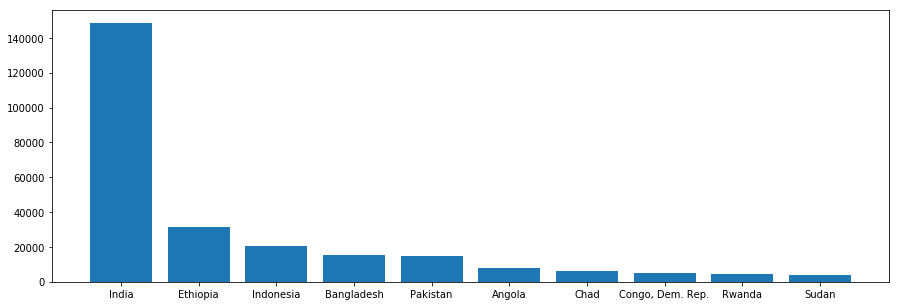

In [56]:
fig, axs = plt.subplots(1, figsize=(15, 5), sharey=True)
axs.bar(df_meningitis.keys(),df_meningitis.values)

We confirm that in those countries where there have been conflicts, the schooling rate is lower and certain diseases cause child deaths. Sobre todo en países del llamado Cuerno de África.
#### "The Horn of Africa is a region continuously in crisis. Ethiopia occupies a predominant position in the Horn due to its demographic importance: about 85% of the population of that area lives there. However, the history of Ethiopia is to a large extent marked by conflicts between ethnic groups living from resources and space, as well as between nationalism and Marxism-Leninism in modern times. The rest of the region also faces ongoing wars: a civil war erupted in Somalia in 1986, so the country has not had any national government in operation since 1991." https://es.wikipedia.org/wiki/Conflictos_en_el_Cuerno_de_%C3%81frica

<a id='conclusions'></a>
## Conclusions

> It is found that conflicts cause lack of schooling and in turn, this causes certain diseases in childhood with cause of death. 
> We must be aware of the importance of children growing up in peace and receiving minimal schooling so that they grow up healthy and educate their children also in peace.